In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /home/shankar/Downloads/cats_and_dogs_filtered.zip

--2021-02-24 18:02:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.167.144, 172.217.31.208, 172.217.160.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.167.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/home/shankar/Downloads/cats_and_dogs_filtered.zip’

/home/shankar/Downl 100%[===================>]  65.43M  2.82MB/s    in 20s     

2021-02-24 18:02:52 (3.22 MB/s) - ‘/home/shankar/Downloads/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
loc='/home/shankar/Downloads/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(loc,'r')
zip_ref.extractall('/home/shankar/Desktop/algorithms/ML_algorithms/datasets')
zip_ref.close()

In [1]:
base_dir=os.path.join(os.getcwd(),'datasets','cats_and_dogs_filtered')
train_path=os.path.join(base_dir,'train')
test_path=os.path.join(base_dir,'validation')
train_cat=os.path.join(train_path,'cats')
test_cat=os.path.join(test_path,'cats')
train_dog=os.path.join(train_path,'dogs')
test_dog=os.path.join(test_path,'dogs')
print('total number of training data',len(os.listdir(train_dog))+len(os.listdir(train_cat)))
print('total number of testing data',len(os.listdir(test_dog))+len(os.listdir(test_cat)))

total number of training data 2000
total number of testing data 1000


In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [4]:
train_data_gen=ImageDataGenerator(rescale=1./255,width_shift_range=0.2,rotation_range=40,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_data_gen=ImageDataGenerator(rescale=1./255)
train_generator=train_data_gen.flow_from_directory(train_path,target_size=(150,150),batch_size=20,class_mode='binary')
test_generator=test_data_gen.flow_from_directory(test_path,target_size=(150,150),batch_size=20,class_mode='binary')
history=model.fit(train_generator,steps_per_epoch=100,epochs=100,validation_data=test_generator,validation_steps=50,verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 118s - loss: 0.6922 - accuracy: 0.5310 - val_loss: 0.6799 - val_accuracy: 0.5240
Epoch 2/100
100/100 - 117s - loss: 0.6826 - accuracy: 0.5630 - val_loss: 0.6561 - val_accuracy: 0.6410
Epoch 3/100
100/100 - 116s - loss: 0.6706 - accuracy: 0.5865 - val_loss: 0.6476 - val_accuracy: 0.6350
Epoch 4/100
100/100 - 109s - loss: 0.6511 - accuracy: 0.6165 - val_loss: 0.6576 - val_accuracy: 0.6240
Epoch 5/100
100/100 - 83s - loss: 0.6418 - accuracy: 0.6450 - val_loss: 0.6008 - val_accuracy: 0.6730
Epoch 6/100
100/100 - 74s - loss: 0.6299 - accuracy: 0.6430 - val_loss: 0.5793 - val_accuracy: 0.7030
Epoch 7/100
100/100 - 94s - loss: 0.6142 - accuracy: 0.6630 - val_loss: 0.5784 - val_accuracy: 0.6940
Epoch 8/100
100/100 - 111s - loss: 0.6081 - accuracy: 0.6645 - val_loss: 0.5643 - val_accuracy: 0.7070
Epoch 9/100
100/100 - 102s - loss: 0.6026 - accuracy: 0.6715 - val_loss: 0.5640 - val_accuracy:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
n_rows=4
n_cols=4
pic_index=0

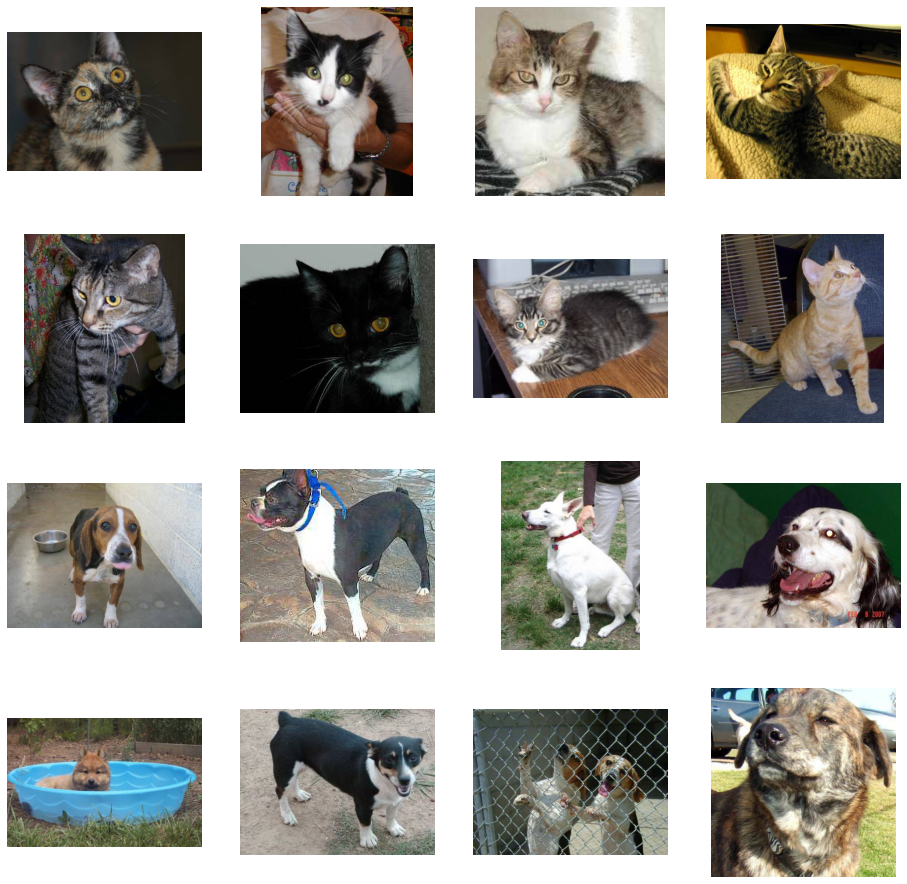

In [6]:
fig=plt.gcf()
fig.set_size_inches(n_rows*4,n_cols*4)
pic_index+=8
dog_images=[os.path.join(train_dog,file_name) for file_name in os.listdir(train_dog)[pic_index-8:pic_index]]
cat_images=[os.path.join(train_cat,file_name) for file_name in os.listdir(train_cat)[pic_index-8:pic_index]]
for index,img in enumerate(cat_images+dog_images):
    sp=plt.subplot(n_rows,n_cols,index+1)
    sp.axis('Off')
    img=pltimg.imread(img)
    plt.imshow(img)

plt.show()

In [7]:
from keras.preprocessing import image
import numpy as np
image_read=image.load_img(os.path.join(test_cat,os.listdir(test_cat)[56]),target_size=(150,150))
img=image.img_to_array(image_read)
img=img.reshape((1,)+img.shape)
img*=1./255
classes=model.predict_classes(img,batch_size=10)
classes[0][0]

0

Text(0.5, 1.0, 'training and validation losses')

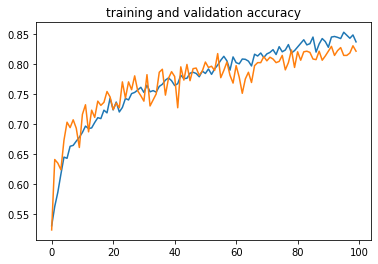

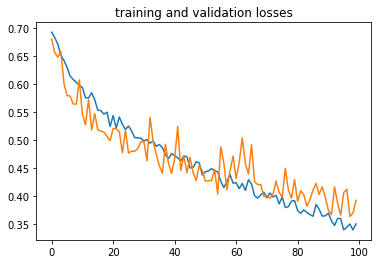

In [8]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(100)
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('training and validation accuracy')
plt.figure()
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('training and validation losses')

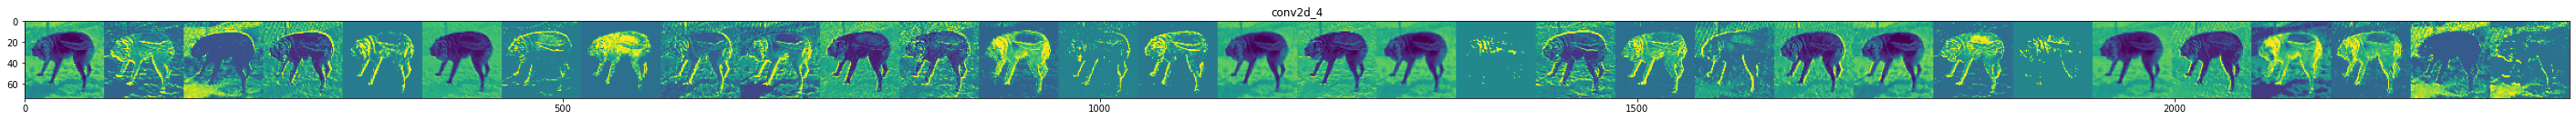

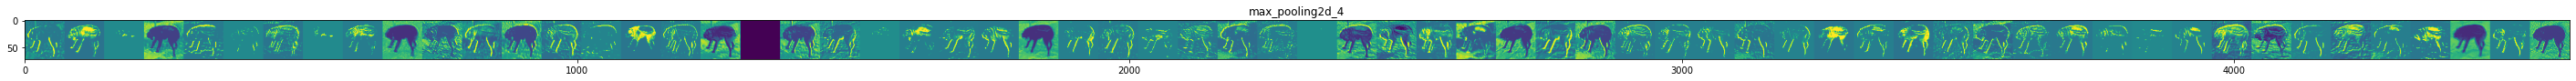

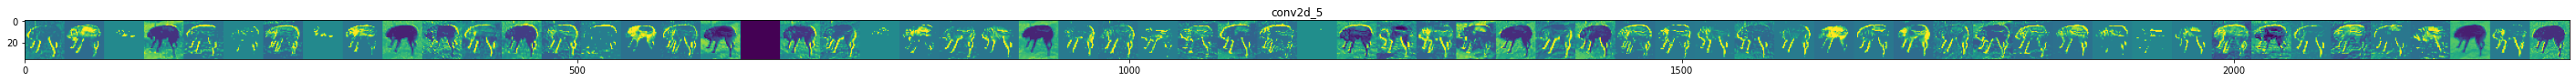

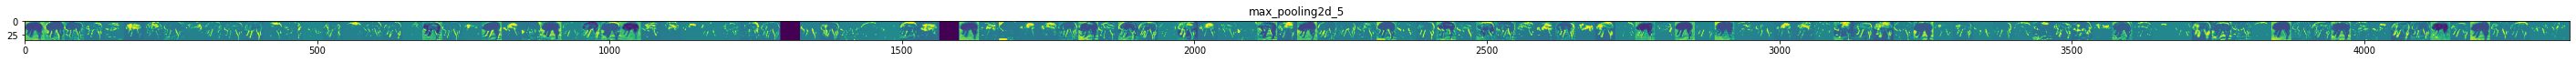

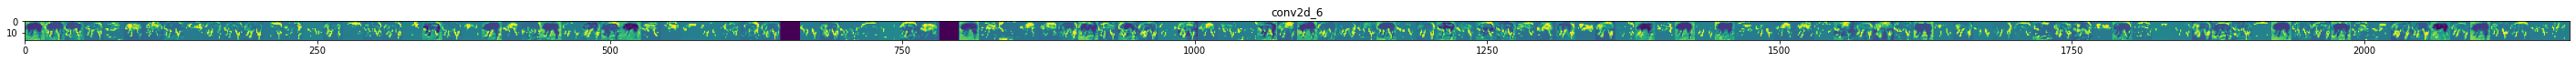

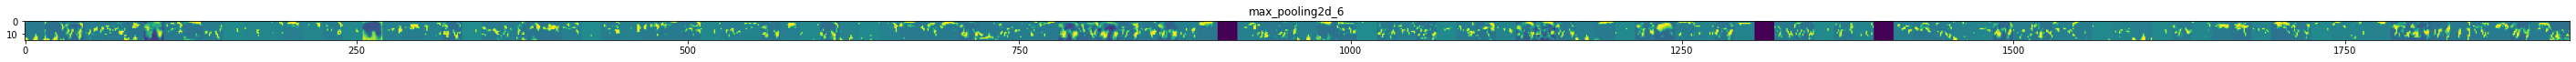

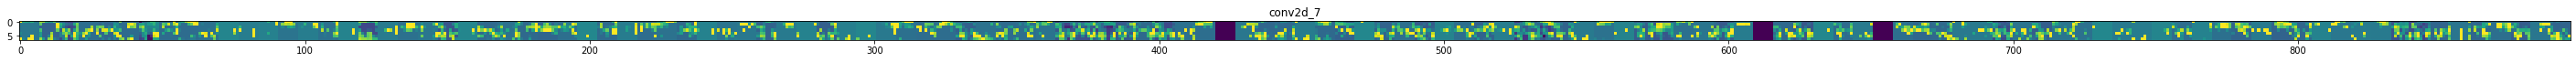

In [11]:
import random

successive_outputs=[layer.output for layer in model.layers[1:]]
visualizer=tf.keras.models.Model(inputs=model.inputs,outputs=successive_outputs)
cat_img_files=[os.path.join(train_cat,f) for f in os.listdir(train_cat)]
dog_img_files=[os.path.join(train_dog,f) for f in os.listdir(train_dog)]
image_path=random.choice(cat_img_files+dog_img_files)
image_read=image.load_img(image_path,target_size=(150,150))
img=image.img_to_array(image_read)
img=img.reshape((1,)+img.shape)
img*=1./255
feature_maps=visualizer.predict(img)
feature_names=[layer.name for layer in model.layers]
for layer_name,feature_map in zip(feature_names,feature_maps):
    if len(feature_map.shape)==4:
        n_features=feature_map.shape[-1]
        size=feature_map.shape[1]
        display=np.zeros((size,size*n_features))
        for i in range(n_features):
            x=feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x=np.clip(x,0,255).astype('uint8')
            display[:, i * size : (i + 1) * size] = x
        scale = 50./n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display, aspect='auto', cmap='viridis' ) 